# Exercises week 42

**October 13-17, 2025**

Date: **Deadline is Friday October 17 at midnight**


# Overarching aims of the exercises this week

The aim of the exercises this week is to train the neural network you implemented last week.

To train neural networks, we use gradient descent, since there is no analytical expression for the optimal parameters. This means you will need to compute the gradient of the cost function wrt. the network parameters. And then you will need to implement some gradient method.

You will begin by computing gradients for a network with one layer, then two layers, then any number of layers. Keeping track of the shapes and doing things step by step will be very important this week.

We recommend that you do the exercises this week by editing and running this notebook file, as it includes some checks along the way that you have implemented the neural network correctly, and running small parts of the code at a time will be important for understanding the methods. If you have trouble running a notebook, you can run this notebook in google colab instead(https://colab.research.google.com/drive/1FfvbN0XlhV-lATRPyGRTtTBnJr3zNuHL#offline=true&sandboxMode=true), though we recommend that you set up VSCode and your python environment to run code like this locally.

First, some setup code that you will need.


In [1]:
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Defining some activation functions
def ReLU(z):
    return np.where(z > 0, z, 0)

# Derivative of the ReLU function
def ReLU_der(z):
    return np.where(z > 0, 1, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def mse(predict, target):
    return np.mean((predict - target) ** 2)

# Exercise 1 - Understand the feed forward pass

**a)** Complete last weeks' exercises if you haven't already (recommended).


# Exercise 2 - Gradient with one layer using autograd

For the first few exercises, we will not use batched inputs. Only a single input vector is passed through the layer at a time.

In this exercise you will compute the gradient of a single layer. You only need to change the code in the cells right below an exercise, the rest works out of the box. Feel free to make changes and see how stuff works though!


**a)** If the weights and bias of a layer has shapes (10, 4) and (10), what will the shapes of the gradients of the cost function wrt. these weights and this bias be?


*ANSWER:* 

Shape of the gradients of the cost function wrt. the weights : (10,4), wrt. the bias : (10)

**b)** Complete the feed_forward_one_layer function. It should use the sigmoid activation function. Also define the weigth and bias with the correct shapes.


In [2]:
def feed_forward_one_layer(W, b, x):
    z = np.dot(W, x) + b
    a = sigmoid(z)
    return a

def cost_one_layer(W, b, x, target):
    predict = feed_forward_one_layer(W, b, x)
    return mse(predict, target)

x = np.random.rand(2)
target = np.random.rand(3)

W = np.random.rand(3, 2)
b = np.random.rand(3)

**c)** Compute the gradient of the cost function wrt. the weigth and bias by running the cell below. You will not need to change anything, just make sure it runs by defining things correctly in the cell above. This code uses the autograd package which uses backprogagation to compute the gradient!


In [3]:
autograd_one_layer = grad(cost_one_layer, [0, 1])
W_g, b_g = autograd_one_layer(W, b, x, target)
print(W_g, b_g)

[[0.03881919 0.0168135 ]
 [0.05629792 0.02438395]
 [0.00863747 0.00374109]] [0.05702667 0.08270351 0.01268874]


# Exercise 3 - Gradient with one layer writing backpropagation by hand

Before you use the gradient you found using autograd, you will have to find the gradient "manually", to better understand how the backpropagation computation works. To do backpropagation "manually", you will need to write out expressions for many derivatives along the computation.


We want to find the gradient of the cost function wrt. the weight and bias. This is quite hard to do directly, so we instead use the chain rule to combine multiple derivatives which are easier to compute.

$$
\frac{dC}{dW} = \frac{dC}{da}\frac{da}{dz}\frac{dz}{dW}
$$

$$
\frac{dC}{db} = \frac{dC}{da}\frac{da}{dz}\frac{dz}{db}
$$


**a)** Which intermediary results can be reused between the two expressions?


*ANSWER:* 

In both equations we find $\frac{dC}{da}$ and $\frac{da}{dz}$.

For the first term we get (using MSE as cost funciton)
$$
\frac{dC}{da^l} = \frac{d}{da}(\frac{1}{2}(a^l-y)^2) = (a^l-y) 
$$
and for the second, we use the activation functions (sigmoid, ReLu, ...)
$$
\frac{da}{dz} = activation/function/of/choise
$$

**b)** What is the derivative of the cost wrt. the final activation? You can use the autograd calculation to make sure you get the correct result. Remember that we compute the mean in mse.


In [4]:
z = W @ x + b
a = sigmoid(z)
predict = a

def mse_der(predict, target):
    return 2 * (predict - target) / target.size

print(mse_der(predict, target))

cost_autograd = grad(mse, 0)
print(cost_autograd(predict, target))

[0.40581533 0.44706566 0.09081296]
[0.40581533 0.44706566 0.09081296]


**c)** What is the expression for the derivative of the sigmoid activation function? You can use the autograd calculation to make sure you get the correct result.


In [5]:
def sigmoid_der(z):
    return sigmoid(z) * (1 - sigmoid(z))

print(sigmoid_der(z))

sigmoid_autograd = elementwise_grad(sigmoid, 0)
print(sigmoid_autograd(z))

[0.1405237  0.18499185 0.13972384]
[0.1405237  0.18499185 0.13972384]


**d)** Using the two derivatives you just computed, compute this intermetidary gradient you will use later:

$$
\frac{dC}{dz} = \frac{dC}{da}\frac{da}{dz}
$$


In [6]:
dC_da = mse_der(predict, target)
da_dz = sigmoid_der(z)
dC_dz = dC_da * da_dz

**e)** What is the derivative of the intermediary z wrt. the weight and bias? What should the shapes be? The one for the weights is a little tricky, it can be easier to play around in the next exercise first. You can also try computing it with autograd to get a hint.


*ANSWER:* 

Definition of (z) and a:
$$
z^l = W^l*a^{l - 1} + b^l
$$
$$
a^l = \sigma(z^l)
$$

$$
\frac{dz}{dW} = a^{l - 1}
$$
with shape (3,2)

$$
\frac{dz}{db} = 1
$$
With shape (3)

**f)** Now combine the expressions you have worked with so far to compute the gradients! Note that you always need to do a feed forward pass while saving the zs and as before you do backpropagation, as they are used in the derivative expressions


In [7]:
dC_da = mse_der(predict, target)
da_dz = sigmoid_der(z)
dC_dz = dC_da * da_dz
dC_dW = np.outer(dC_dz, x)
dC_db = dC_dz

print(dC_dW, dC_db)

[[0.03881919 0.0168135 ]
 [0.05629792 0.02438395]
 [0.00863747 0.00374109]] [0.05702667 0.08270351 0.01268874]


In [8]:
print(dC_dW.shape, dC_db.shape)

(3, 2) (3,)


You should get the same results as with autograd.


In [9]:
W_g, b_g = autograd_one_layer(W, b, x, target)
print(W_g, b_g)

[[0.03881919 0.0168135 ]
 [0.05629792 0.02438395]
 [0.00863747 0.00374109]] [0.05702667 0.08270351 0.01268874]


# Exercise 4 - Gradient with two layers writing backpropagation by hand


Now that you have implemented backpropagation for one layer, you have found most of the expressions you will need for more layers. Let's move up to two layers.


In [10]:
x = np.random.rand(2)
target = np.random.rand(4)

W1 = np.random.rand(3, 2)
b1 = np.random.rand(3)

W2 = np.random.rand(4, 3)
b2 = np.random.rand(4)

layers = [(W1, b1), (W2, b2)]

In [11]:
z1 = W1 @ x + b1
a1 = sigmoid(z1)
z2 = W2 @ a1 + b2
a2 = sigmoid(z2)

We begin by computing the gradients of the last layer, as the gradients must be propagated backwards from the end.

**a)** Compute the gradients of the last layer, just like you did the single layer in the previous exercise.


In [12]:
dC_da2 = mse_der(a2, target)
dC_dz2 = dC_da2 * sigmoid_der(z2)
dC_dW2 = np.outer(dC_dz2, a1)
dC_db2 = dC_dz2  
print(dC_dW2, dC_db2)

[[0.0226465  0.02177274 0.02154596]
 [0.02078023 0.01997847 0.01977038]
 [0.01243895 0.01195902 0.01183445]
 [0.01814314 0.01744313 0.01726144]] [0.03485511 0.03198274 0.01914471 0.027924  ]


To find the derivative of the cost wrt. the activation of the first layer, we need a new expression, the one furthest to the right in the following.

$$
\frac{dC}{da_1} = \frac{dC}{dz_2}\frac{dz_2}{da_1}
$$

**b)** What is the derivative of the second layer intermetiate wrt. the first layer activation? (First recall how you compute $z_2$)

$$
\frac{dz_2}{da_1}
$$


*ANSWER:* 

Definition of $z_2$ and $a_1$:
$$
z_2 = W_2*a_1 + b_2
$$
$$
a_1 = \sigma(z_2)
$$

Then 
$$
\frac{dz_2}{da_1} = W_2
$$

In [13]:
dz2_da1 = W2.T
dC_da1 = dz2_da1 @ dC_dz2

**c)** Use this expression, together with expressions which are equivelent to ones for the last layer to compute all the derivatives of the first layer.

$$
\frac{dC}{dW_1} = \frac{dC}{da_1}\frac{da_1}{dz_1}\frac{dz_1}{dW_1}
$$

$$
\frac{dC}{db_1} = \frac{dC}{da_1}\frac{da_1}{dz_1}\frac{dz_1}{db_1}
$$


In [14]:
dC_da1 = W2.T @ dC_dz2
dC_dz1 = dC_da1 * sigmoid_der(z1)
dC_dW1 = np.outer(dC_dz1, x)
dC_db1 = dC_dz1

In [15]:
print(dC_dW1, dC_db1)
print(dC_dW2, dC_db2)

[[0.00030995 0.00146997]
 [0.00063009 0.00298828]
 [0.00059171 0.00280629]] [0.00638922 0.01298858 0.01219759]
[[0.0226465  0.02177274 0.02154596]
 [0.02078023 0.01997847 0.01977038]
 [0.01243895 0.01195902 0.01183445]
 [0.01814314 0.01744313 0.01726144]] [0.03485511 0.03198274 0.01914471 0.027924  ]


**d)** Make sure you got the same gradient as the following code which uses autograd to do backpropagation.


In [16]:
def feed_forward_two_layers(layers, x):
    W1, b1 = layers[0]
    z1 = W1 @ x + b1
    a1 = sigmoid(z1)

    W2, b2 = layers[1]
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)

    return a2

In [17]:
def cost_two_layers(layers, x, target):
    predict = feed_forward_two_layers(layers, x)
    return mse(predict, target)

grad_two_layers = grad(cost_two_layers, 0)
g = grad_two_layers(layers, x, target)

**e)** How would you use the gradient from this layer to compute the gradient of an even earlier layer? Would the expressions be any different?


*ANSWER:*

Implementation of the backpropagation algorithm, which involves applaying the chain rule iteratively across each layer, moving from the output layer to the first hidden layer.


# Exercise 5 - Gradient with any number of layers writing backpropagation by hand


Well done on getting this far! Now it's time to compute the gradient with any number of layers.

First, some code from the general neural network code from last week. Note that we are still sending in one input vector at a time. We will change it to use batched inputs later.


In [18]:
def create_layers(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(layer_output_size, i_size)
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers


def feed_forward(input, layers, activation_funcs):
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = W @ a + b
        a = activation_func(z)
    return a


def cost(layers, input, activation_funcs, target):
    predict = feed_forward(input, layers, activation_funcs)
    return mse(predict, target)

You might have already have noticed a very important detail in backpropagation: You need the values from the forward pass to compute all the gradients! The feed forward method above is great for efficiency and for using autograd, as it only cares about computing the final output, but now we need to also save the results along the way.

Here is a function which does that for you.


In [19]:
def feed_forward_saver(input, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = W @ a + b
        a = activation_func(z)

        zs.append(z)

    return layer_inputs, zs, a

**a)** Now, complete the backpropagation function so that it returns the gradient of the cost function wrt. all the weigths and biases. Use the autograd calculation below to make sure you get the correct answer.


In [20]:
def backpropagation(
    input, layers, activation_funcs, target, activation_ders, cost_der=mse_der
):
    layer_inputs, zs, predict = feed_forward_saver(input, layers, activation_funcs)

    layer_grads = [() for layer in layers]

    # We loop over the layers, from the last to the first
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]

        if i == len(layers) - 1:
            # For last layer we use cost derivative as dC_da(L) can be computed directly
            dC_da = cost_der(predict, target)
        else:
            # For other layers we build on previous z derivative, as dC_da(i) = dC_dz(i+1) * dz(i+1)_da(i)
            (W, b) = layers[i + 1]
            dC_da = W.T @ dC_dz

        dC_dz = dC_da * activation_der(z)
        dC_dW = np.outer(dC_dz, layer_input)
        dC_db = dC_dz   

        layer_grads[i] = (dC_dW, dC_db)

    return layer_grads

In [21]:
network_input_size = 2
layer_output_sizes = [3, 4]
activation_funcs = [sigmoid, ReLU]
activation_ders = [sigmoid_der, ReLU_der]

layers = create_layers(network_input_size, layer_output_sizes)

x = np.random.rand(network_input_size)
target = np.random.rand(4)

In [22]:
layer_grads = backpropagation(x, layers, activation_funcs, target, activation_ders)
print(layer_grads)

[(array([[0.00430428, 0.14201226],
       [0.00503243, 0.16603657],
       [0.00293655, 0.09688662]]), array([0.27816543, 0.32522284, 0.18977591])), (array([[-0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        ],
       [ 0.46699288,  0.29276394,  0.27966761]]), array([-0.        , -0.        , -0.        ,  0.72312814]))]


In [23]:
cost_grad = grad(cost, 0)
cost_grad(layers, x, [sigmoid, ReLU], target)

[(array([[0.00430428, 0.14201226],
         [0.00503243, 0.16603657],
         [0.00293655, 0.09688662]]),
  array([0.27816543, 0.32522284, 0.18977591])),
 (array([[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.46699288, 0.29276394, 0.27966761]]),
  array([0.        , 0.        , 0.        , 0.72312814]))]

# Exercise 6 - Batched inputs

Make new versions of all the functions in exercise 5 which now take batched inputs instead. See last weeks exercise 5 for details on how to batch inputs to neural networks. You will also need to update the backpropogation function.


In [24]:
def create_layers_batch(network_input_size, layer_output_sizes):
    layers = []
    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(i_size, layer_output_size)
        b = np.random.randn(layer_output_size, 1)
        layers.append((W, b))
        i_size = layer_output_size
    return layers
def feed_forward_batch(inputs, layers, activation_funcs):
    a = inputs 
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = W.T @ a + b  
        a = activation_func(z)
    return a
def cost_batch(layers, input, activation_funcs, target):
    predict = feed_forward_batch(input, layers, activation_funcs)
    return mse(predict, target) 
def feed_forward_saver_batch(input, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = W.T @ a + b 
        a = activation_func(z)
        zs.append(z)
    return layer_inputs, zs, a
def backpropagation_batch(
    input, layers, activation_funcs, target, activation_ders, cost_der=mse_der
):
    layer_inputs, zs, predict = feed_forward_saver_batch(input, layers, activation_funcs)
    batch_size = input.shape[1]
    layer_grads = [() for layer in layers]
    # We loop over the layers, from the last to the first
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]
        if i == len(layers) - 1:
            # For last layer we use cost derivative as dC_da(L) can be computed directly
            dC_da = cost_der(predict, target) 
        else:
            # For other layers we build on previous z derivative, as dC_da(i) = dC_dz(i+1) * dz(i+1)_da(i)
            (W, b) = layers[i + 1]
            dC_da  = W @ dC_dz 

        dC_dz = dC_da * activation_der(z)  
        dC_dW = (layer_input @ dC_dz.T) / batch_size  
        dC_db = np.sum(dC_dz, axis=1, keepdims=True) / batch_size  

        layer_grads[i] = (dC_dW, dC_db)  
    return layer_grads
batch_size = 20
network_input_size = 6
layer_output_sizes = [2, 4] 
activation_funcs = [sigmoid, ReLU]
activation_ders  = [sigmoid_der, ReLU_der]
layers = create_layers_batch(network_input_size, layer_output_sizes)
x = np.random.rand(network_input_size, batch_size)
target = np.random.rand(4, batch_size)
layer_grads = backpropagation_batch(x, layers, activation_funcs, target, activation_ders)
print(layer_grads)

[(array([[-0.00099213, -0.00037832],
       [-0.00077293, -0.00030706],
       [-0.00168959, -0.00059699],
       [-0.00202658, -0.00076958],
       [-0.00128822, -0.00048676],
       [-0.001663  , -0.00071071]]), array([[-0.00278456],
       [-0.00109541]])), (array([[ 0.00000000e+00, -4.30599113e-05,  4.99950855e-03,
        -4.84576271e-04],
       [ 0.00000000e+00, -9.24254147e-05,  4.32102685e-03,
         1.42458503e-04]]), array([[ 0.        ],
       [-0.00021079],
       [ 0.01140133],
       [-0.000738  ]]))]


# Exercise 7 - Training


**a)** Complete exercise 6 and 7 from last week, but use your own backpropogation implementation to compute the gradient.
- IMPORTANT: Do not implement the derivative terms for softmax and cross-entropy separately, it will be very hard!
- Instead, use the fact that the derivatives multiplied together simplify to **prediction - target** (see [source1](https://medium.com/data-science/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1), [source2](https://shivammehta25.github.io/posts/deriving-categorical-cross-entropy-and-softmax/))

**b)** Use stochastic gradient descent with momentum when you train your network.


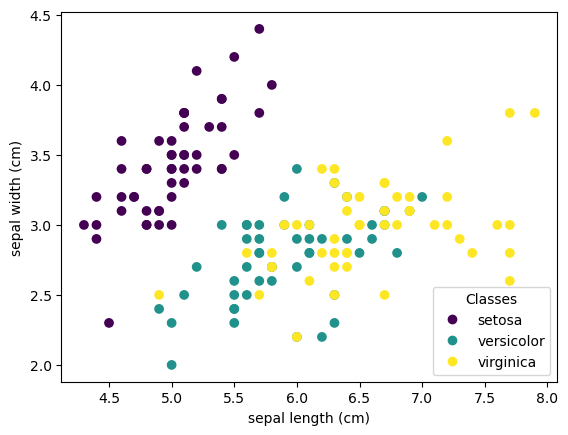

In [25]:
iris = datasets.load_iris()

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [26]:
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return e_z / np.sum(e_z, axis=0, keepdims=True)

def cross_entropy(predict, target):
    return -np.mean(np.sum(target * np.log(predict + 1e-8), axis=0))

def cross_entropy_der(predictions, targets):
    return predictions - targets

def accuracy(predictions, targets):
    pred_labels = np.argmax(predictions, axis=0)
    true_labels = np.argmax(targets, axis=0)
    return np.mean(pred_labels == true_labels)

def train_network_momentum(
    inputs, layers, activation_funcs, activation_ders,
    targets, learning_rate=0.1, momentum=0.9, epochs=100, batch_size=10
):
    n_samples = inputs.shape[1]
    velocities = [(np.zeros_like(W), np.zeros_like(b)) for (W, b) in layers]

    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        inputs_shuffled = inputs[:, indices]
        targets_shuffled = targets[:, indices]

        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            x_batch = inputs_shuffled[:, start:end]
            y_batch = targets_shuffled[:, start:end]

            grads = backpropagation_batch(
                x_batch, layers, activation_funcs, y_batch,
                activation_ders, cost_der=cross_entropy_der
            )

            for i, ((W, b), (dW, db)) in enumerate(zip(layers, grads)):
                vW, vb = velocities[i]
                vW = momentum * vW - learning_rate * dW
                vb = momentum * vb - learning_rate * db
                W += vW
                b += vb
                velocities[i] = (vW, vb)

    return layers

inputs = iris.data.T  # (4, 150)
targets = np.zeros((3, len(iris.data)))  # (3, 150)
for i, t in enumerate(iris.target):
    targets[t, i] = 1

network_input_size = 4
layer_output_sizes = [8, 3]
activation_funcs = [sigmoid, softmax]
activation_ders = [sigmoid_der, lambda z: 1]
layers = create_layers_batch(network_input_size, layer_output_sizes)

trained_layers = train_network_momentum(
    inputs, layers, activation_funcs, activation_ders, targets,
    learning_rate=0.01, momentum=0.9, epochs=100, batch_size=10
)

preds = feed_forward_batch(inputs, trained_layers, activation_funcs)
print("Final accuracy:", accuracy(preds, targets))

Final accuracy: 0.9666666666666667


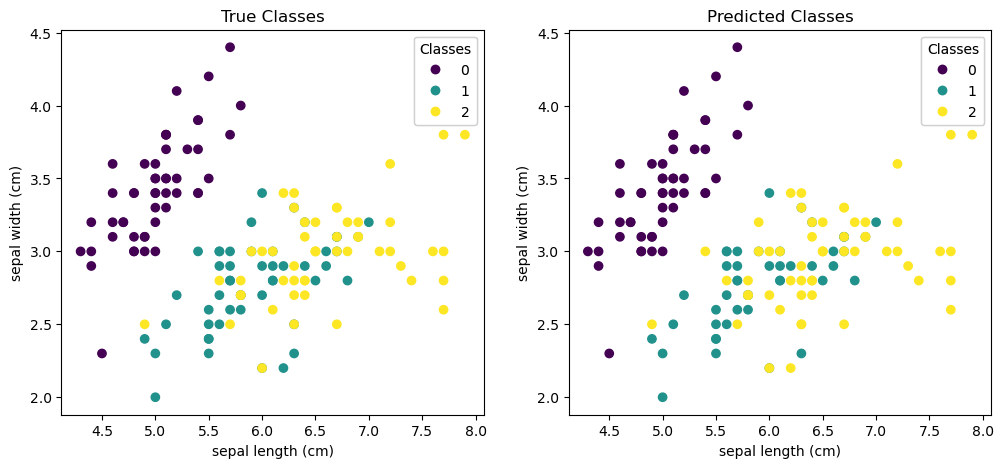

In [27]:
# Plotting true vs predicted classes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# True classes
scatter1 = ax1.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap='viridis')
ax1.set_title("True Classes")
ax1.set_xlabel(iris.feature_names[0])
ax1.set_ylabel(iris.feature_names[1])
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")
ax1.add_artist(legend1)
# Predicted classes
predicted_classes = np.argmax(preds, axis=0)  # Get the predicted class indices
scatter2 = ax2.scatter(iris.data[:, 0], iris.data[:, 1], c=predicted_classes, cmap='viridis')
ax2.set_title("Predicted Classes")
ax2.set_xlabel(iris.feature_names[0])
ax2.set_ylabel(iris.feature_names[1])
legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes")
ax2.add_artist(legend2)
plt.show()

# Exercise 8 (Optional) - Object orientation

Passing in the layers, activations functions, activation derivatives and cost derivatives into the functions each time leads to code which is easy to understand in isoloation, but messier when used in a larger context with data splitting, data scaling, gradient methods and so forth. Creating an object which stores these values can lead to code which is much easier to use.

**a)** Write a neural network class. You are free to implement it how you see fit, though we strongly recommend to not save any input or output values as class attributes, nor let the neural network class handle gradient methods internally. Gradient methods should be handled outside, by performing general operations on the layer_grads list using functions or classes separate to the neural network.

We provide here a skeleton structure which should get you started.


In [28]:
class NeuralNetwork:
    def __init__(
        self,
        network_input_size,
        layer_output_sizes,
        activation_funcs,
        activation_ders,
        cost_fun,
        cost_der,
    ):
        pass

    def predict(self, inputs):
        # Simple feed forward pass
        pass

    def cost(self, inputs, targets):
        pass

    def _feed_forward_saver(self, inputs):
        pass

    def compute_gradient(self, inputs, targets):
        pass

    def update_weights(self, layer_grads):
        pass

    # These last two methods are not needed in the project, but they can be nice to have! The first one has a layers parameter so that you can use autograd on it
    def autograd_compliant_predict(self, layers, inputs):
        pass

    def autograd_gradient(self, inputs, targets):
        pass